In [ ]:
%matplotlib inline

# Introduction to Deep Learning with Keras and TensorFlow

**Sergio Peignier**

To help you understand the basis of DL, this demo will present you two kinds of Auto-Encoders to encode the Olivetti faces dataset
+ An MLP autoencoder
+ A CNN autoencoder

## The Auto-Encoder Task
 Our goal is to learn a function that learns a first function, called the encoder, that maps the original dataset $R^N$ into a lower dimensional dataset $E_{\theta}: R^N \to R^k$ with $k < N$ and the a function, called the decoder, that receives the encoder output and aims at retrieving the original signal $D_{\theta'}: R^k \to R^N$ such that a loss function (e.g., MSE) $L: R^N, R^N \to R$ is minimal:
 
  $Min_{\theta,\theta'} \quad L(D_{\theta'}(E_\theta(X)), X)$

  $\theta$ and $\theta'$ simply represent the parameters of the encoder and the decoder (i.e., the neural network weights)

## Prerequisite Python Modules

In [1]:
import numpy as np     
import tensorflow as tf # deaplearning# advanced math library
import matplotlib.pyplot as plt      # plotting routines
from keras.models import Model       # Model type to be used
from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools
import keras #deeplearning surcouche à utiliser en premier lieu sinon utiliser tensorflow ou pytorch
import os
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [36]:
t = 64
X = [] # chaque ligne est une immage de 128x128 : chaque pixel dans une colonne
for direct in os.listdir("dataset/"):
    if direct != ".DS_Store":
        for file in os.listdir(f"dataset/{direct}/"):
            if file != ".DS_Store":
                img = Image.open(f"dataset/{direct}/{file}")
                img = img.resize((t,t))
                arr = np.array(img)/255
            X.append(arr)
X = np.array(X)

In [37]:
X.shape

(70001, 64, 64, 3)

In [38]:
X_train, X_test = train_test_split(X,
                                   test_size=0.2, 
                                   random_state=0)

In [39]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# Encoder
input_img = Input(shape=(t, t, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 16, 16, 128)       7385

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=250,
                batch_size=100,
                shuffle=True,
                validation_data=(X_test, X_test))

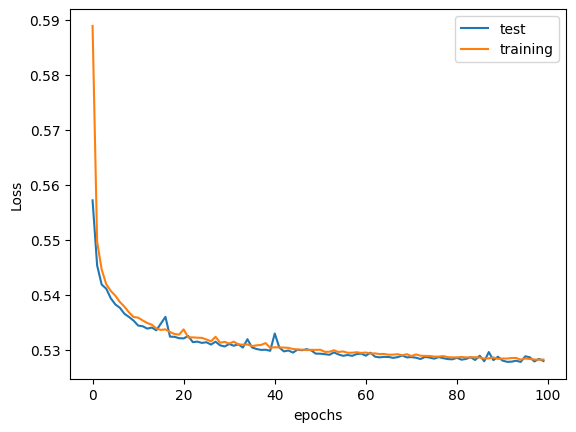

In [31]:
history = autoencoder.history.history
plt.plot(history['val_loss'],label="test")
plt.plot(history['loss'],label="training")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()

  3/125 [..............................] - ETA: 3s 

2023-03-03 22:36:27.790083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 3s 25ms/step


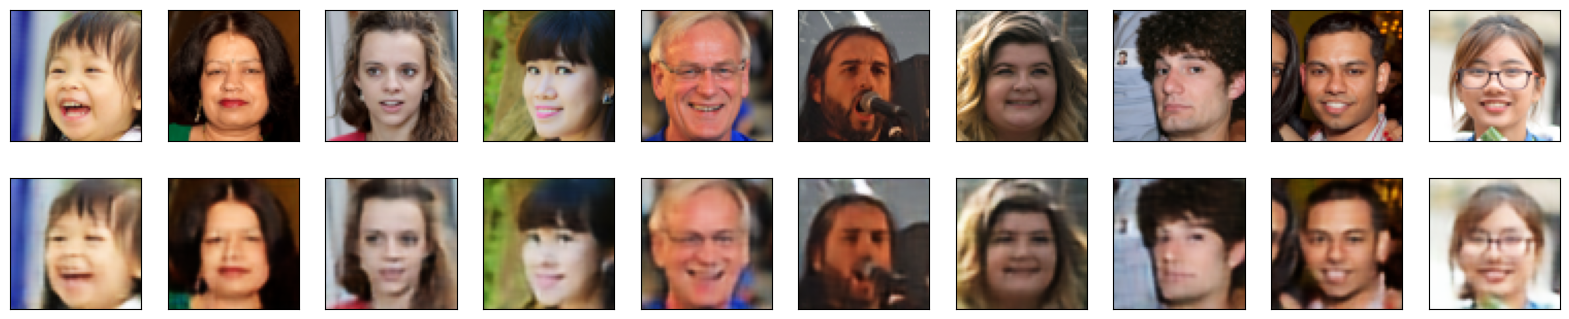

In [32]:
decoded_imgs = autoencoder.predict(X_test)
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many faces we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(t, t,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(t, t,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
autoencoder.save('saved_model/v4')


INFO:tensorflow:Assets written to: saved_model/v3/assets


INFO:tensorflow:Assets written to: saved_model/v3/assets


__Olivetti faces dataset__: Each row is a gray scale human face picture and each column is a pixel. Each picture (64x64 pixels) has been flattened into a 1D vector (64x64 = 4096 pixels), each 2D image can be retrieved by resizing the corresponding 1D vector.

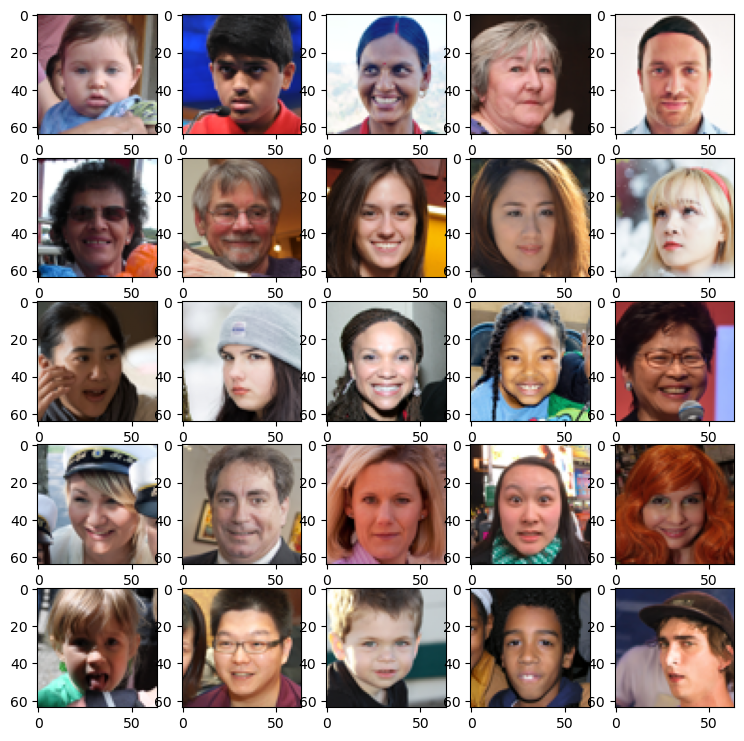

In [78]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger
for i in range(25):
    plt.gray()
    plt.subplot(5,5,i+1)
    image2D = X[i,:]
    image2D = image2D.reshape(64,64)
    plt.imshow(image2D)

Split the dataset into train and test

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X,
                                   test_size=0.2, 
                                   random_state=0)

# Building fully connected encoder and decoder networks

In [80]:
original_dim = X.shape[1]
hidden_encoding_dim = 512
encoding_dim = 64
hidden_decoding_dim = 512
dropout_level = 0.1

# "encoded" is the encoded representation of the input
input_img = keras.Input(shape=(original_dim,))
hidden_encoded = Dense(hidden_encoding_dim, activation='relu')(input_img)
dropout_hidden_encoded = Dropout(dropout_level)(hidden_encoded)
encoded = Dense(encoding_dim, activation='relu')(dropout_hidden_encoded)
dropout_encoded = Dropout(dropout_level)(encoded)

# "decoded" is the reconstruction of the input
hidden_decoded = Dense(hidden_decoding_dim, activation='relu')(dropout_encoded)
dropout_hidden_decoded = Dropout(dropout_level)(hidden_decoded)
decoded = Dense(original_dim, activation='sigmoid')(dropout_hidden_decoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
# This model maps an input to is encoded representation 
encoder = keras.Model(input_img, encoded)
# This model maps an imput with the same dim as the encoded to the reconstruction
input_encoded_img = keras.Input(shape=(encoding_dim,))
hidden_decoder_layer = autoencoder.layers[-3]
hidden_dropout_decoded_layer = autoencoder.layers[-2]
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(input_encoded_img, decoder_layer(hidden_dropout_decoded_layer(hidden_decoder_layer(input_encoded_img))))

# Plot the models architectures

In [81]:
tf.keras.utils.plot_model(
    autoencoder,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=70,
    layer_range=None,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [82]:
tf.keras.utils.plot_model(
    encoder,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=70,
    layer_range=None,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [83]:
tf.keras.utils.plot_model(
    decoder,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    expand_nested=False,
    dpi=70,
    layer_range=None,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Compiling the model

When you will compile a model, Keras will ask you to specify your **loss function** and your **optimizer**. 
Since our values are between 0 and 1 we can use a 'binary_crossentropy' and we can choose 'adam' as the optimizer.

In [84]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Fit the model

In [85]:
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=64,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/100
13/13 [==============================] - 2s 100ms/step - loss: 0.6769 - val_loss: 0.6638
Epoch 2/100
13/13 [==============================] - 1s 88ms/step - loss: 0.6607 - val_loss: 0.6536
Epoch 3/100
13/13 [==============================] - 1s 88ms/step - loss: 0.6516 - val_loss: 0.6452
Epoch 4/100
13/13 [==============================] - 1s 88ms/step - loss: 0.6433 - val_loss: 0.6361
Epoch 5/100
13/13 [==============================] - 1s 88ms/step - loss: 0.6375 - val_loss: 0.6302
Epoch 6/100
13/13 [==============================] - 1s 88ms/step - loss: 0.6305 - val_loss: 0.6259
Epoch 7/100
13/13 [==============================] - 1s 95ms/step - loss: 0.6253 - val_loss: 0.6207
Epoch 8/100
13/13 [==============================] - 1s 93ms/step - loss: 0.6247 - val_loss: 0.6196
Epoch 9/100
13/13 [==============================] - 1s 90ms/step - loss: 0.6198 - val_loss: 0.6186
Epoch 10/100
13/13 [==============================] - 1s 90ms/step - loss: 0.6174 - val_loss: 0.615

# Plot the learning curve

In [86]:
history = autoencoder.history.history

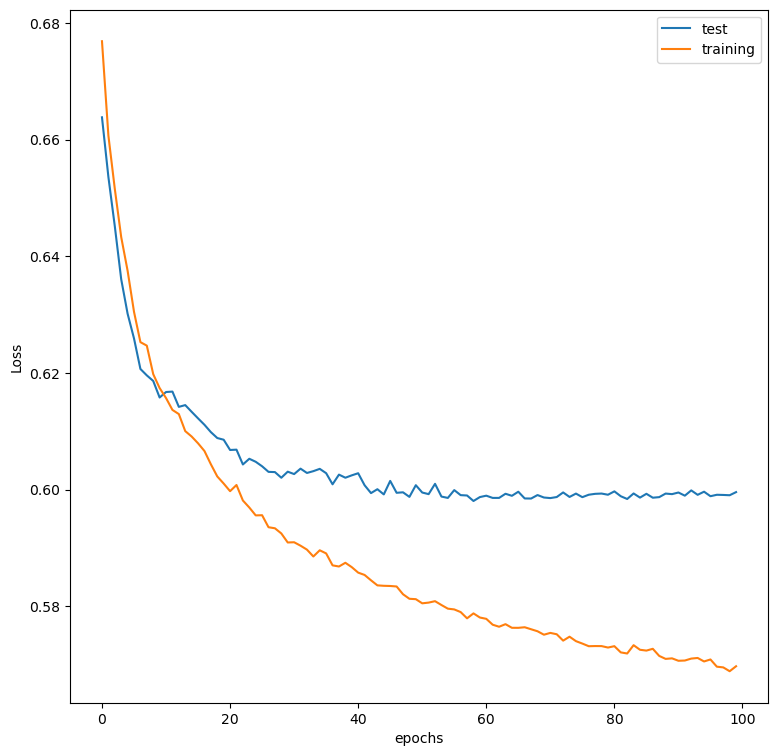

In [87]:
plt.plot(history['val_loss'],label="test")
plt.plot(history['loss'],label="training")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()

# Plot the results

7/7 [==============================] - 0s 4ms/step


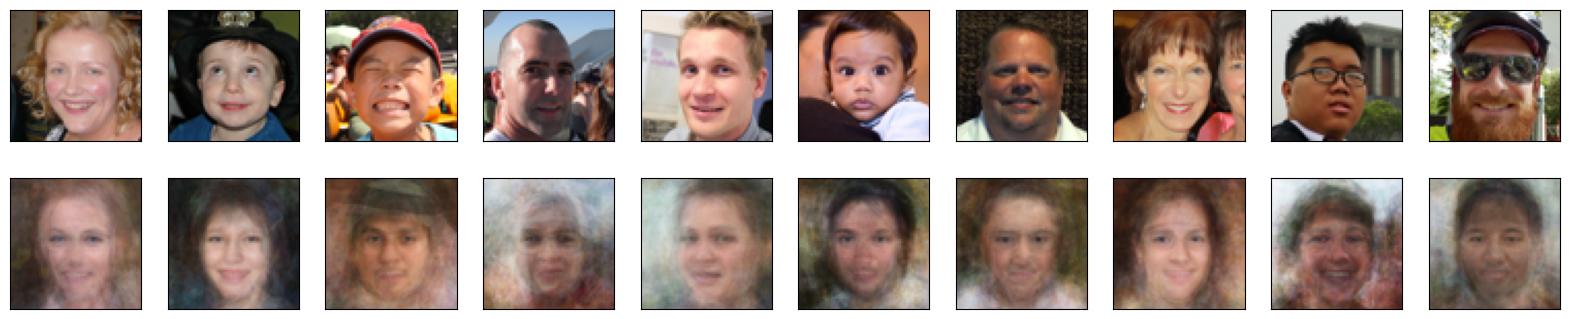

In [89]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many faces we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

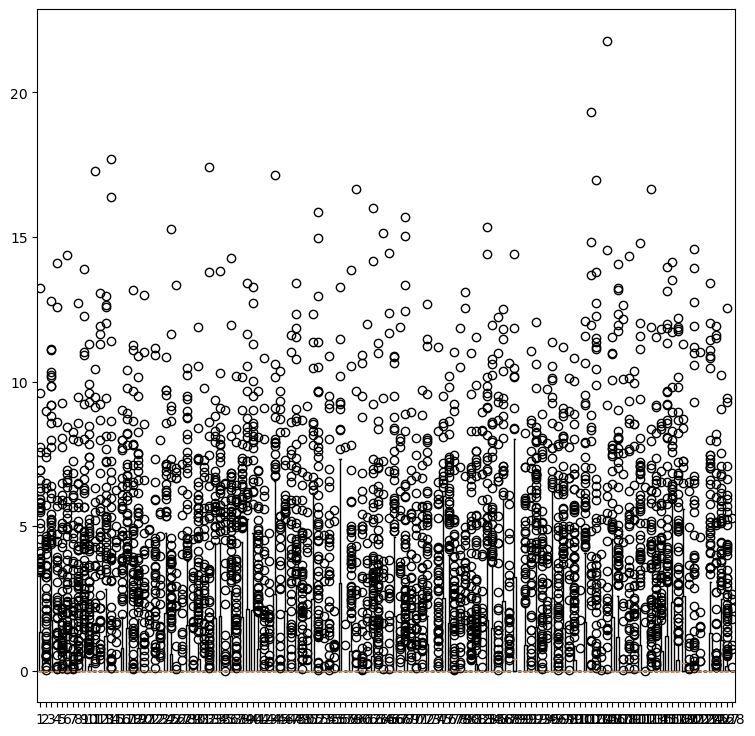

In [43]:
_=plt.boxplot(encoded_imgs)

In [44]:
encoded_imgs.std(axis=0) , encoded_imgs.mean(axis=0)

(array([2.1735175 , 1.5905743 , 2.7968554 , 1.767479  , 1.5526937 ,
        1.8992962 , 1.5691648 , 1.8823913 , 2.365137  , 2.1546257 ,
        1.9493798 , 2.2591877 , 2.4835172 , 2.3747427 , 0.8293884 ,
        1.9054393 , 2.3098402 , 2.2982569 , 2.1144893 , 1.6382711 ,
        0.6373351 , 1.6946467 , 0.98009753, 2.3162963 , 2.1160076 ,
        1.3789555 , 0.95831394, 2.4102516 , 0.6308614 , 2.1551125 ,
        1.4910862 , 2.144007  , 2.176286  , 2.3988712 , 1.3152988 ,
        2.2847977 , 1.7713245 , 2.2176375 , 2.4762223 , 2.7031877 ,
        1.7354499 , 1.4859453 , 0.6217297 , 2.8167892 , 1.8759954 ,
        1.8876638 , 1.9451358 , 2.553789  , 1.5213057 , 1.1229117 ,
        2.5004456 , 2.8619385 , 0.50533533, 1.9183997 , 0.56544775,
        2.6498048 , 0.56015164, 1.885096  , 1.4413298 , 1.806192  ,
        1.1215854 , 2.166492  , 2.0205715 , 1.5010322 , 1.7530509 ,
        2.4292762 , 1.5401462 , 2.4756489 , 1.3140287 , 1.2940156 ,
        1.5459926 , 2.314756  , 0.        , 1.64

1/1 [==============================] - 0s 18ms/step


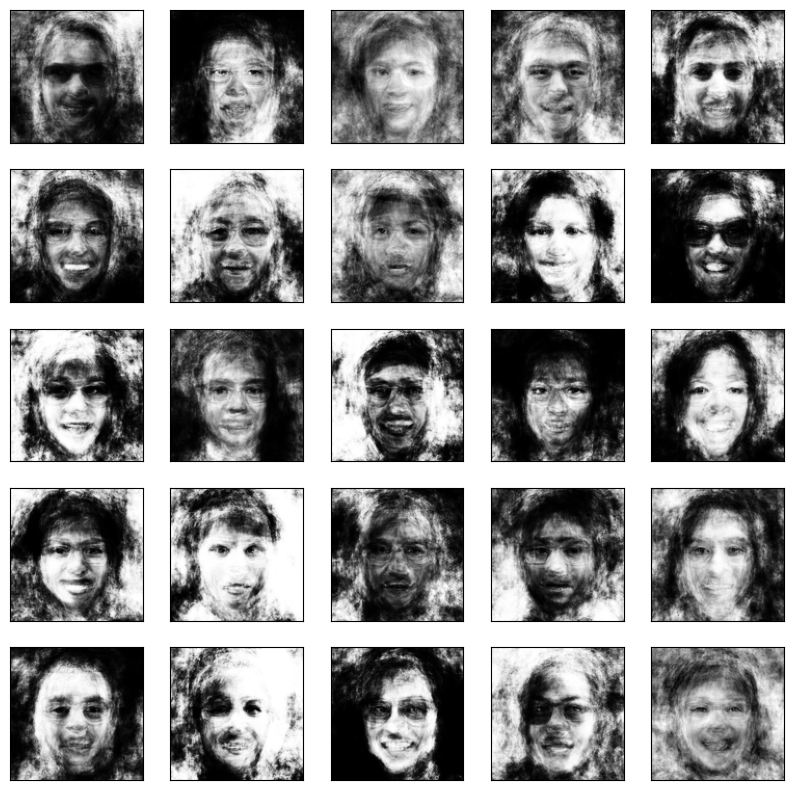

In [46]:
n = 25  # How many faces we will display
encoded_random_imgs = np.random.randn(n,64) * encoded_imgs.std(axis=0)*2 + encoded_imgs.mean(axis=0) 
decoded_imgs = decoder.predict(encoded_random_imgs)
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(n):
    # Display original
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(decoded_imgs[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# CNN Model

In [65]:
keras.layers.Conv2D?

Init signature: keras.layers.Conv2D(*args, **kwargs)
Docstring:     
2D convolution layer (e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved
with the layer input to produce a tensor of
outputs. If `use_bias` is True,
a bias vector is created and added to the outputs. Finally, if
`activation` is not `None`, it is applied to the outputs as well.

When using this layer as the first layer in a model,
provide the keyword argument `input_shape`
(tuple of integers or `None`, does not include the sample axis),
e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
in `data_format="channels_last"`. You can use `None` when
a dimension has variable size.

Examples:

>>> # The inputs are 28x28 RGB images with `channels_last` and the batch
>>> # size is 4.
>>> input_shape = (4, 28, 28, 3)
>>> x = tf.random.normal(input_shape)
>>> y = tf.keras.layers.Conv2D(
... 2, 3, activation='relu', input_shape=input_shape[1:])(x)
>>> print(y.shape)
(4, 26, 26, 

In [66]:
input_shape = (64,64,1)
encoded_dim = 10

input_img = keras.Input(shape=input_shape)
x = keras.layers.Conv2D(64, (3, 3),strides=1,activation='relu', padding='same')(input_img)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Conv2D(32, (3, 3),strides=1,activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64,"relu")(x)
encoded = keras.layers.Dense(encoded_dim,activation='relu')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional
x = keras.layers.Dense(64,"relu")(encoded)
x = keras.layers.Dense(4*4*8,"relu")(x)
x = keras.layers.Reshape((4,4,8))(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
decoded = keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)

In [67]:
tf.keras.utils.plot_model(
    autoencoder,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=70,
    layer_range=None,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [68]:
tf.keras.utils.plot_model(
    encoder,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=70,
    layer_range=None,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [69]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [70]:
X_train = X_train.reshape(-1,64,64,1)
X_test = X_test.reshape(-1,64,64,1)

In [71]:
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/100
100/100 [==============================] - 21s 201ms/step - loss: 0.6708 - val_loss: 0.6517
Epoch 2/100
100/100 [==============================] - 22s 215ms/step - loss: 0.6459 - val_loss: 0.6516
Epoch 3/100
100/100 [==============================] - 22s 215ms/step - loss: 0.6394 - val_loss: 0.6470
Epoch 4/100
100/100 [==============================] - 21s 209ms/step - loss: 0.6365 - val_loss: 0.6445
Epoch 5/100
100/100 [==============================] - 21s 206ms/step - loss: 0.6352 - val_loss: 0.6438
Epoch 6/100
100/100 [==============================] - 20s 203ms/step - loss: 0.6342 - val_loss: 0.6453
Epoch 7/100
100/100 [==============================] - 21s 211ms/step - loss: 0.6333 - val_loss: 0.6470
Epoch 8/100
100/100 [==============================] - 21s 209ms/step - loss: 0.6330 - val_loss: 0.6438
Epoch 9/100
100/100 [==============================] - 21s 209ms/step - loss: 0.6324 - val_loss: 0.6440
Epoch 10/100
100/100 [==============================] - 23s 226m

KeyboardInterrupt: 

In [ ]:
history = autoencoder.history.history

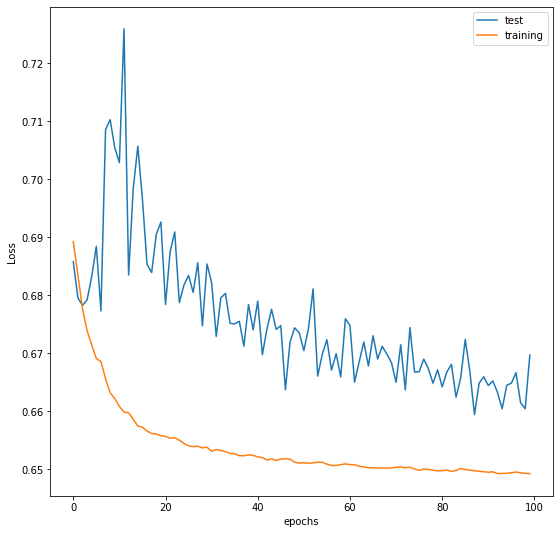

In [ ]:
plt.plot(history['val_loss'],label="test")
plt.plot(history['loss'],label="training")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()

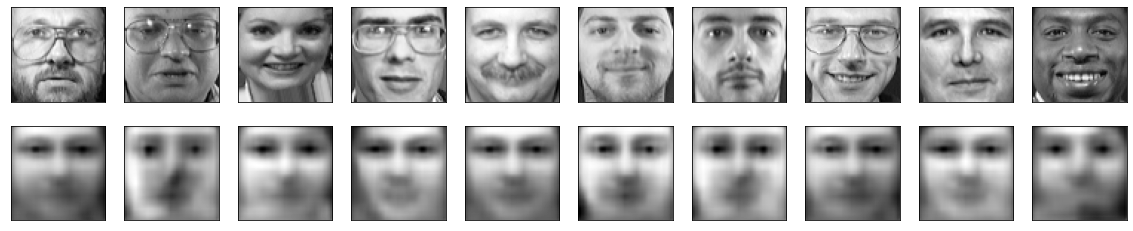

In [ ]:
decoded_imgs = autoencoder.predict(X_test)
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many faces we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()